In [1]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="whitegrid")

In [3]:
ruta_data = "C:\\Users\\User\\Documents\\U Central\\DeepLearning\\DL_T1\\data\\House_Rent_Dataset.csv"

In [4]:
df = pd.read_csv(ruta_data)
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df["Rent"].describe().apply(lambda x: f"$ {x:,.2f}")

count        $ 4,746.00
mean        $ 34,993.45
std         $ 78,106.41
min          $ 1,200.00
25%         $ 10,000.00
50%         $ 16,000.00
75%         $ 33,000.00
max      $ 3,500,000.00
Name: Rent, dtype: object

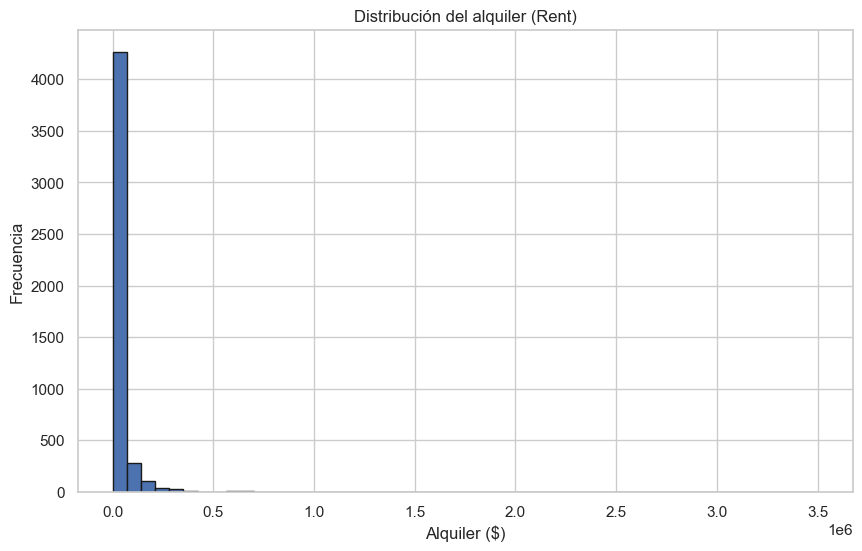

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df["Rent"], bins=50, edgecolor="k")
plt.title("Distribución del alquiler (Rent)")
plt.xlabel("Alquiler ($)")
plt.ylabel("Frecuencia")
plt.show()

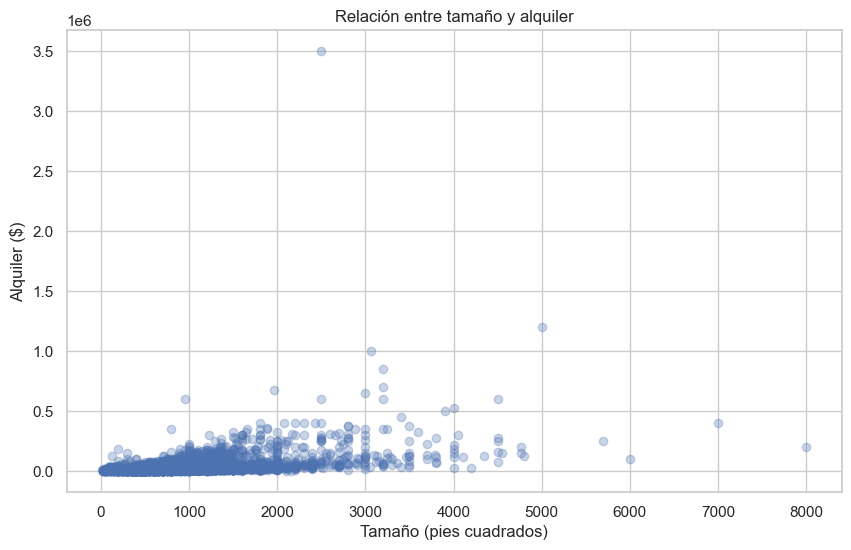

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Size"], df["Rent"], alpha=0.3)
plt.title("Relación entre tamaño y alquiler")
plt.xlabel("Tamaño (pies cuadrados)")
plt.ylabel("Alquiler ($)")
plt.show()


Distribución por ciudad:
City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64


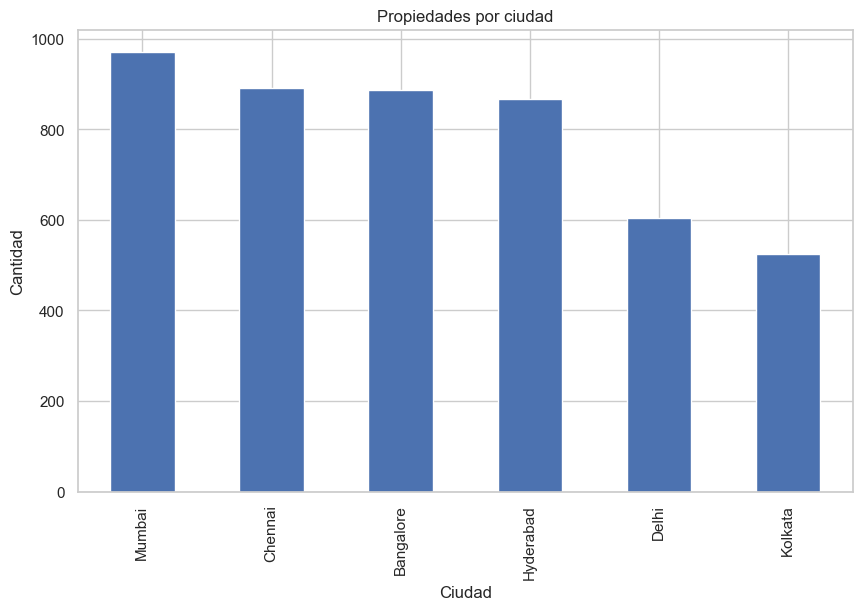

In [8]:
city_counts = df["City"].value_counts()
print("\nDistribución por ciudad:")
print(city_counts)

plt.figure(figsize=(10, 6))
city_counts.plot(kind="bar")
plt.title("Propiedades por ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Cantidad")
plt.show()

In [9]:
# Extraer piso actual y total de pisos
df[["Floor_Number", "Total_Floors"]] = df["Floor"].str.extract(r'(\d+)\s*out of (\d+)').astype(float)

# Verificar valores únicos
print("\nPisos únicos (Floor_Number):", df["Floor_Number"].unique())
print("Total de pisos únicos (Total_Floors):", df["Total_Floors"].unique())


Pisos únicos (Floor_Number): [nan  1.  2.  4.  3.  5.  7.  8. 11.  6. 14. 43. 13. 18. 17.  9. 19. 60.
 34. 12. 26. 25. 53. 16. 10. 39. 32. 47. 28. 20. 15. 65. 40. 37. 22. 21.
 30. 35. 33. 44. 41. 46. 27. 45. 48. 50. 24. 23. 29. 49. 36. 76.]
Total de pisos únicos (Total_Floors): [nan  3.  2.  4.  1.  5. 14.  8. 19. 10.  7. 13. 78. 18. 12. 24. 31. 21.
 23. 20. 22. 58. 66. 48. 40. 44. 42. 41. 60. 32. 30. 29. 89. 15. 16.  6.
 11. 28. 17. 45. 35. 75. 38. 51. 43. 25. 27. 26. 76.  9. 36. 37. 55. 68.
 77. 50. 59. 62. 39. 52. 54. 33. 46. 85. 71. 81. 34.]


In [10]:
pattern = re.compile(r"(?P<floor>\d+|Ground|Upper Basement|Lower Basement) out of (?P<height>\d+)")
df[df["Floor"].apply(lambda x: pattern.match(x).groupdict() if pattern.match(x) else None).isna()]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor_Number,Total_Floors
2553,2022-06-18,2,20000,400,3,Super Area,"Kasturba Niketan, Lajpat Nagar 2",Delhi,Unfurnished,Bachelors/Family,1,Contact Owner,NaN,NaN
2883,2022-05-23,1,18000,450,Ground,Carpet Area,"DDA Flat AD Block, Shalimar Bagh AD Block",Delhi,Furnished,Bachelors/Family,1,Contact Owner,NaN,NaN
4490,2022-06-12,3,15000,900,1,Super Area,"Malakpet, NH 9",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,NaN,NaN
4560,2022-05-31,3,15000,1270,1,Carpet Area,Tarnaka,Hyderabad,Furnished,Family,2,Contact Owner,NaN,NaN


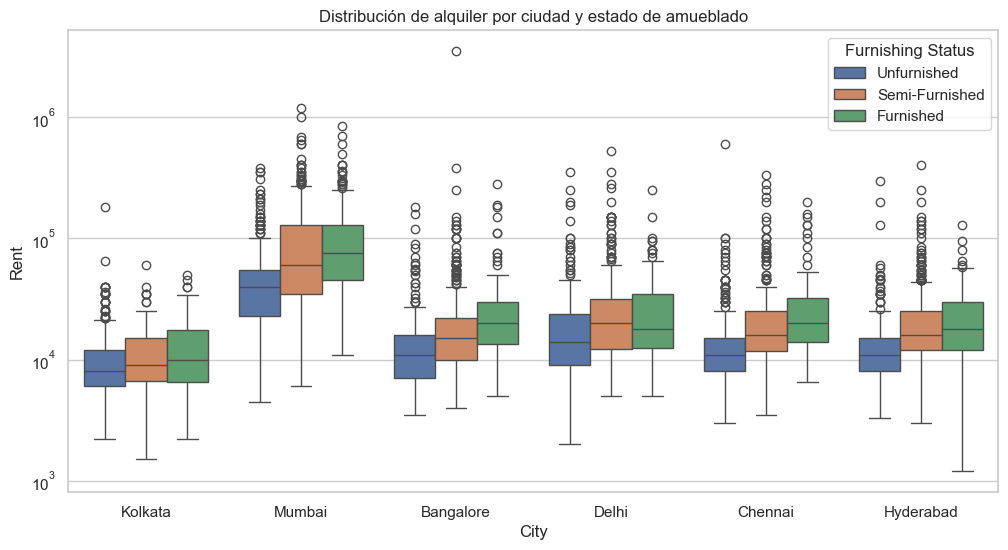

In [11]:
# 1. Alquiler vs. Ciudad + Estado de amueblado
plt.figure(figsize=(12,6))
sns.boxplot(x="City", y="Rent", hue="Furnishing Status", data=df)
plt.yscale("log")  # Escala logarítmica por outliers
plt.title("Distribución de alquiler por ciudad y estado de amueblado")
plt.show()

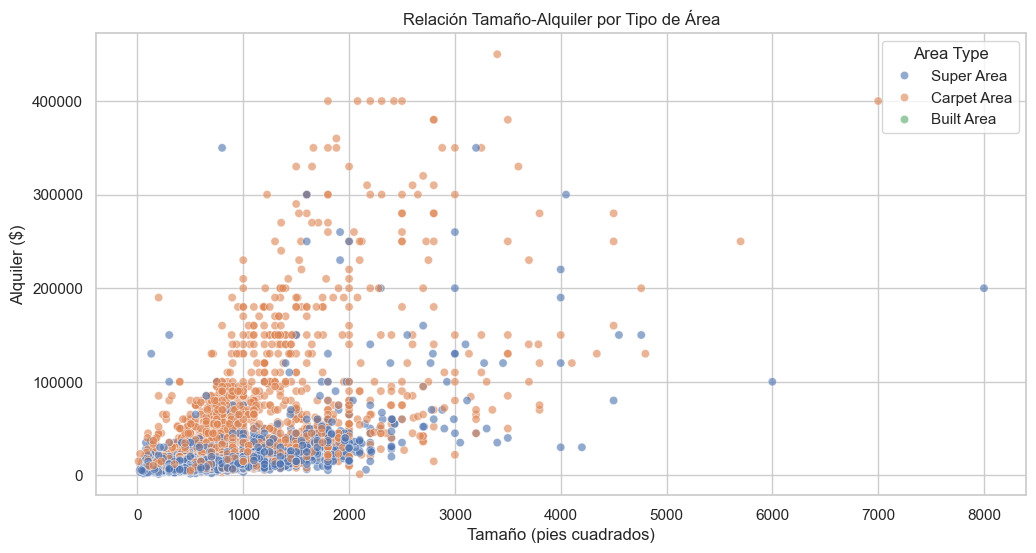

In [12]:
# 2. Relación Tamaño-Alquiler por Tipo de Área
plt.figure(figsize=(12,6))
sns.scatterplot(x="Size", y="Rent", hue="Area Type", 
                alpha=0.6, data=df[df["Rent"] < 500000])
plt.title("Relación Tamaño-Alquiler por Tipo de Área")
plt.xlabel("Tamaño (pies cuadrados)")
plt.ylabel("Alquiler ($)")
plt.show()

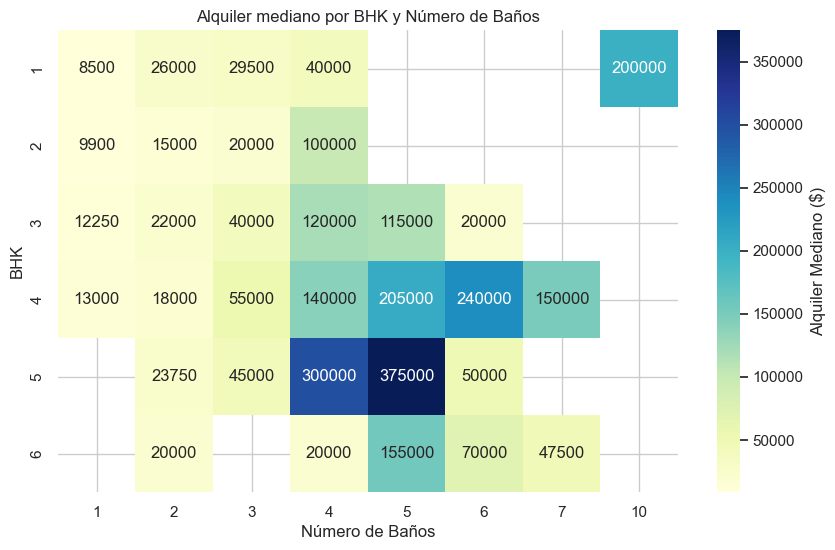

In [13]:
# 3. Alquiler promedio por BHK y Baños (CÓDIGO CORREGIDO)
plt.figure(figsize=(10,6))
df_grouped = df.groupby(["BHK", "Bathroom"])["Rent"].median().reset_index()

# Usar parámetros nombrados en pivot()
pivot_table = df_grouped.pivot(
    index="BHK", 
    columns="Bathroom", 
    values="Rent"
)

sns.heatmap(pivot_table, 
            annot=True, 
            fmt=".0f", 
            cmap="YlGnBu",
            cbar_kws={'label': 'Alquiler Mediano ($)'})

plt.title("Alquiler mediano por BHK y Número de Baños")
plt.xlabel("Número de Baños")
plt.ylabel("BHK")
plt.show()

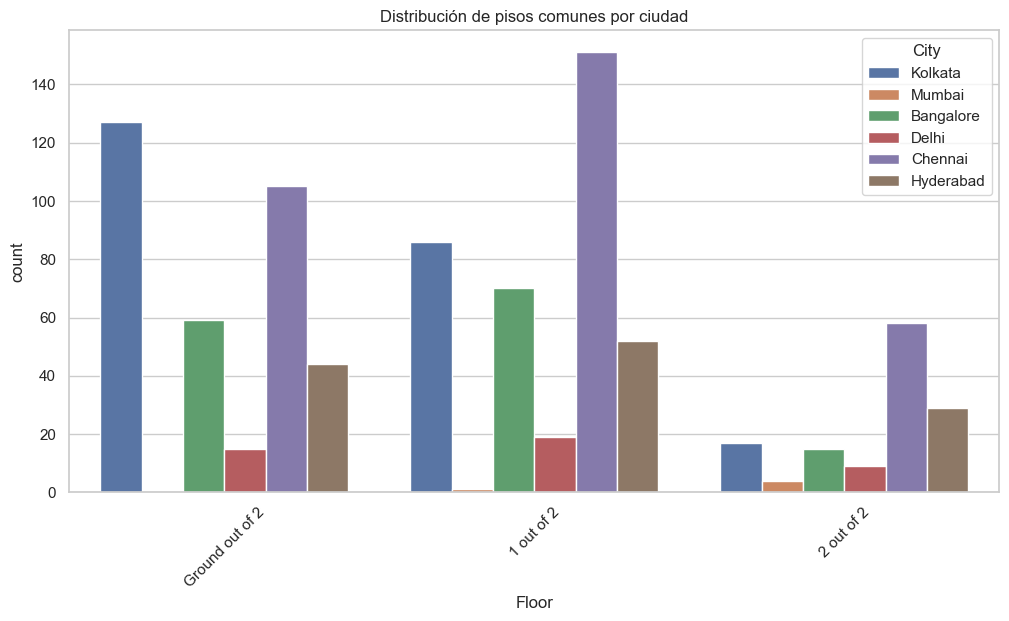

In [14]:
# 4. Distribución de pisos por ciudad
plt.figure(figsize=(12,6))
sns.countplot(x="Floor", hue="City", 
             data=df[df["Floor"].isin(["Ground out of 2", "1 out of 2", "2 out of 2"])])
plt.title("Distribución de pisos comunes por ciudad")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

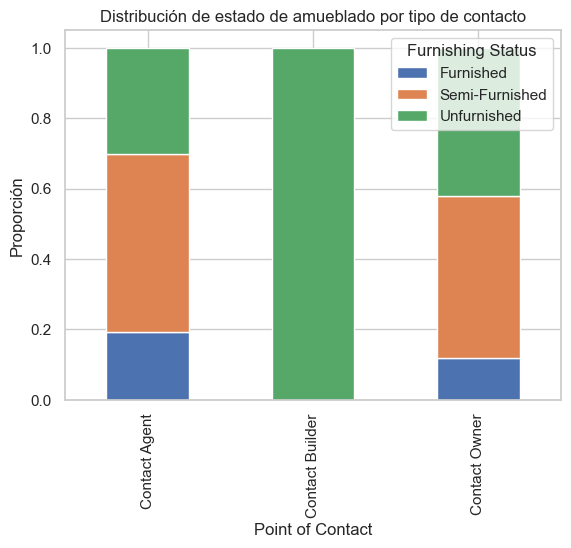

In [15]:
# 5. Tipo de contacto vs. Estado de amueblado
plt.figure(figsize=(10,6))
pd.crosstab(df["Point of Contact"], df["Furnishing Status"], 
            normalize="index").plot(kind="bar", stacked=True)
plt.title("Distribución de estado de amueblado por tipo de contacto")
plt.ylabel("Proporción")
plt.show()